# Python for Data Analysis

Manipulating, processing, cleaning, and crunching data in Python.

## Preliminaries

Essential Python Libraries

1. NumPy (**Num**erical **Py**thon)
2. pandas
3. matplotlib
4. IPython
5. SciPy

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introductory Examples

General tasks

1. Interacting with the outside world: Reading and writing with a variety of file formats and databases.
2. Preparation: Cleaning, munging, combining, normalizing, reshaping, slicing, and dicing, and transforming data.
3. Transformation: Applying mathematical and statistical operations.
4. Modeling and Computation: Connecting your data to statistical models, machine learning.
5. Presentation: Creating interactive or static graphical visualisations.

### usa.gov dataset

In [4]:
data_path = 'data/usagov_bitly_data2012-03-16-1331923249.txt'
open(data_path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [10]:
import json

with open(data_path, 'r') as data_file:
    records = [json.loads(line) for line in data_file]

In [15]:
len(records)

3560

In [16]:
type(records)

list

In [17]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in pure Python

In [18]:
type(records[0])

dict

In [19]:
records[0].keys()

[u'a',
 u'c',
 u'nk',
 u'tz',
 u'gr',
 u'g',
 u'h',
 u'cy',
 u'l',
 u'al',
 u'hh',
 u'r',
 u'u',
 u't',
 u'hc',
 u'll']

In [24]:
time_zones = [record['tz'] for record in records if 'tz' in record]

In [25]:
len(time_zones)

3440

In [26]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [27]:
from collections import Counter
time_zone_counter = Counter(time_zones)
time_zone_counter

Counter({u'': 521,
         u'Africa/Cairo': 3,
         u'Africa/Casablanca': 1,
         u'Africa/Ceuta': 2,
         u'Africa/Johannesburg': 1,
         u'Africa/Lusaka': 1,
         u'America/Anchorage': 5,
         u'America/Argentina/Buenos_Aires': 1,
         u'America/Argentina/Cordoba': 1,
         u'America/Argentina/Mendoza': 1,
         u'America/Bogota': 3,
         u'America/Caracas': 1,
         u'America/Chicago': 400,
         u'America/Chihuahua': 2,
         u'America/Costa_Rica': 1,
         u'America/Denver': 191,
         u'America/Edmonton': 6,
         u'America/Guayaquil': 2,
         u'America/Halifax': 4,
         u'America/Indianapolis': 20,
         u'America/La_Paz': 1,
         u'America/Lima': 1,
         u'America/Los_Angeles': 382,
         u'America/Managua': 3,
         u'America/Mazatlan': 1,
         u'America/Mexico_City': 15,
         u'America/Monterrey': 1,
         u'America/Montevideo': 1,
         u'America/Montreal': 9,
         u'America/N

In [30]:
sorted_time_zone_counter = time_zone_counter.most_common()

In [51]:
sorted_time_zone_counter

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33),
 (u'Europe/Berlin', 28),
 (u'Europe/Rome', 27),
 (u'America/Rainy_River', 25),
 (u'Europe/Amsterdam', 22),
 (u'America/Phoenix', 20),
 (u'America/Indianapolis', 20),
 (u'Europe/Warsaw', 16),
 (u'America/Mexico_City', 15),
 (u'Europe/Paris', 14),
 (u'Europe/Stockholm', 14),
 (u'America/Vancouver', 12),
 (u'Pacific/Auckland', 11),
 (u'Europe/Moscow', 10),
 (u'Asia/Hong_Kong', 10),
 (u'America/Puerto_Rico', 10),
 (u'Europe/Helsinki', 10),
 (u'Europe/Prague', 10),
 (u'Europe/Oslo', 10),
 (u'Asia/Calcutta', 9),
 (u'Asia/Istanbul', 9),
 (u'America/Montreal', 9),
 (u'Europe/Lisbon', 8),
 (u'Europe/Athens', 6),
 (u'America/Edmonton', 6),
 (u'Chile/Continental', 6),
 (u'Asia/Bangkok', 6),
 (u'Australia/NSW', 6),
 (u'Europe/Vienna', 6),
 (u'

### Counting Time Zones in pandas

In [32]:
df = pd.DataFrame(records)

In [33]:
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [36]:
df.tz.value_counts().head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [37]:
clean_tz = df.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [39]:
tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

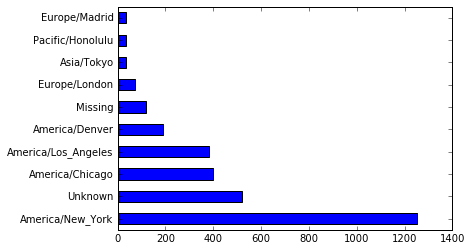

In [48]:
tz_counts.head(10).plot(kind='barh')

In [53]:
df.shape

(3560, 18)

In [54]:
clean_df = df[df.a.notnull()]
clean_df.shape

(3440, 18)

In [56]:
operating_system = np.where(clean_df.a.str.contains('Windows'), 'Windows', 'Not Windows')
operating_system

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], 
      dtype='|S11')

In [57]:
operating_system.shape

(3440,)

### MovieLens 1M Data Set

In [79]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/ml-1m/users.dat', delimiter='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', delimiter='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ml-1m/movies.dat', delimiter='::', header=None, names=mnames, engine='python')

In [80]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [81]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [82]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [84]:
data.dtypes

user_id        int64
movie_id       int64
rating         int64
timestamp      int64
gender        object
age            int64
occupation     int64
zip           object
title         object
genres        object
dtype: object

In [87]:
data.loc[0, :]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object